In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/UI_Engagement/ui_engagement_dataset_with_datetime.csv", parse_dates=['datetime'])

# Add formatted date in "DD-MM-YYYY" format
df['date_formatted'] = df['datetime'].dt.strftime('%d-%m-%Y')

# Save the updated file
df.to_csv("ui_engagement_dataset_final.csv", index=False)


In [3]:
df.head()

,user_id,session_id,ui_version,time_spent_seconds,page_clicks,scroll_depth,datetime,date_formatted
0,1,1_8102,Old,306,2,0.68,2025-06-17 04:52:49,17-06-2025
1,1,1_8026,New,178,4,0.71,2025-06-05 22:55:09,05-06-2025
2,1,1_3193,Old,134,6,0.66,2025-06-15 19:22:33,15-06-2025
3,2,2_3000,New,334,10,0.80,2025-06-05 20:19:44,05-06-2025
4,2,2_4419,Old,46,7,0.53,2025-06-08 04:51:59,08-06-2025


In [4]:
from google.colab import files
files.download ("ui_engagement_dataset_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
df.isnull().sum() #checking for missing values

,0
user_id,0
session_id,0
ui_version,0
time_spent_seconds,0
page_clicks,0
scroll_depth,0
datetime,0
date_formatted,0


In [10]:
df.duplicated().sum() #checking for duplicates

np.int64(0)

In [12]:
df.dtypes #check for data types

,0
user_id,int64
session_id,object
ui_version,object
time_spent_seconds,int64
page_clicks,int64
scroll_depth,float64
datetime,datetime64[ns]
date_formatted,object


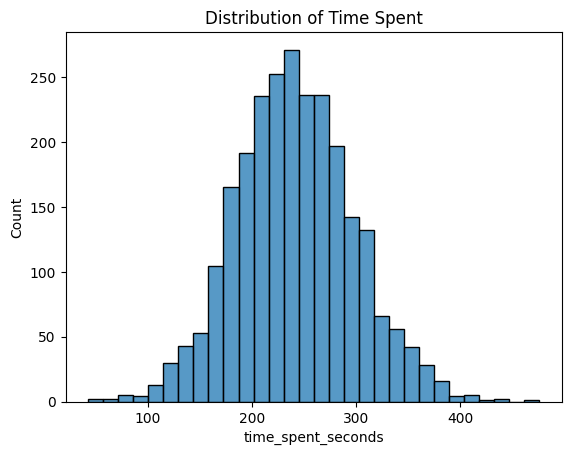

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['time_spent_seconds'],bins=30)
plt.title('Distribution of Time Spent')
plt.show()

## **What's the average time spent per UI version?**

In [14]:
# groups by ui version and calculate the mean time spent
average_time_spent = df.groupby('ui_version')['time_spent_seconds'].mean()

# display the result
print('Average time spent per ui version (in seconds):')
print(average_time_spent)

Average time spent per ui version (in seconds):
ui_version
New    261.769582
Old    219.447908
Name: time_spent_seconds, dtype: float64


/tmp/ipython-input-17-2195450541.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ui_version', y='time_spent_seconds', data=avg_time, palette='viridis')


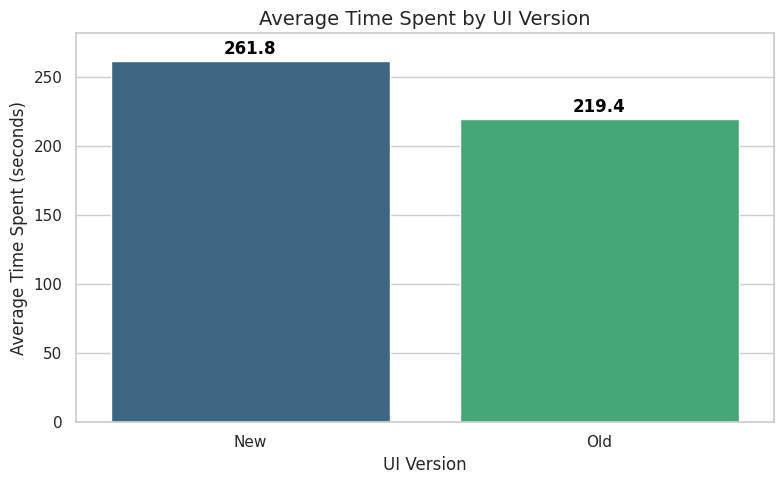

In [17]:
# bar plot of average time spent per ui version

import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Compute average time spent
avg_time = df.groupby('ui_version')['time_spent_seconds'].mean().reset_index()

# Create the barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='ui_version', y='time_spent_seconds', data=avg_time, palette='viridis')

# Customize the plot
plt.title("Average Time Spent by UI Version", fontsize=14)
plt.xlabel("UI Version")
plt.ylabel("Average Time Spent (seconds)")
plt.ylim(0, avg_time['time_spent_seconds'].max() + 20)

# Show the values on top of the bars
for index, row in avg_time.iterrows():
    plt.text(index, row['time_spent_seconds'] + 5, round(row['time_spent_seconds'], 1),
             color='black', ha="center", fontweight='bold')

plt.tight_layout()
plt.show()


# **Are users spending more time with the new ui?**


In [22]:
# Are users spending more time with the new ui?

# Check average time spent
df.groupby('ui_version')['time_spent_seconds'].mean()


,time_spent_seconds
ui_version,
New,261.769582
Old,219.447908


In [23]:
# Check statistical significance
from scipy.stats import ttest_ind

old_ui = df[df['ui_version'] == 'Old']['time_spent_seconds']
new_ui = df[df['ui_version'] == 'New']['time_spent_seconds']

t_stat, p_val = ttest_ind(new_ui, old_ui)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Yes, users are spending significantly more time with the new UI.")
else:
    print("❌ No, the difference is not statistically significant.")


T-statistic: 20.37
P-value: 0.0000
✅ Yes, users are spending significantly more time with the new UI.


### **Are page clicks or scroll depth different across UI versions?**


In [28]:
# compare average

# page clicks
df.groupby('ui_version')['page_clicks'].mean()

,page_clicks
ui_version,
New,6.026616
Old,5.000000


In [29]:
# Scroll depth
df.groupby('ui_version')['scroll_depth'].mean()


,scroll_depth
ui_version,
New,0.750122
Old,0.549836


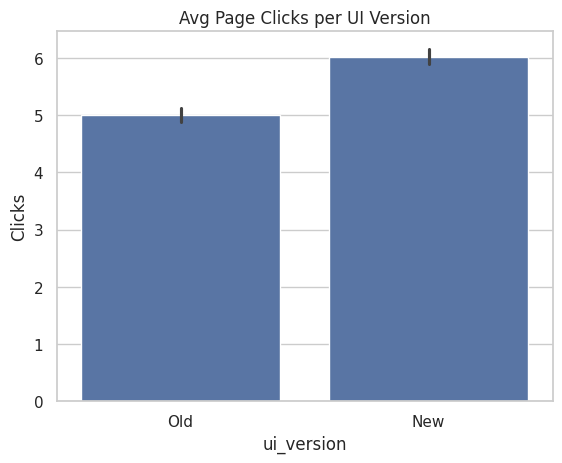

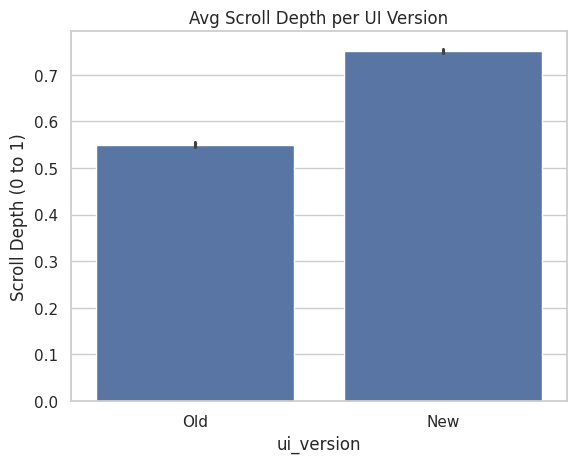

In [31]:
# bar plot for page clicks and scroll depth
import seaborn as sns
import matplotlib.pyplot as plt

# Page Clicks
sns.barplot(x='ui_version', y='page_clicks', data=df)
plt.title("Avg Page Clicks per UI Version")
plt.ylabel("Clicks")
plt.show()

# Scroll Depth
sns.barplot(x='ui_version', y='scroll_depth', data=df)
plt.title("Avg Scroll Depth per UI Version")
plt.ylabel("Scroll Depth (0 to 1)")
plt.show()


In [33]:
# page clicks difference
from scipy.stats import ttest_ind

old_clicks = df[df['ui_version'] == 'Old']['page_clicks']
new_clicks = df[df['ui_version'] == 'New']['page_clicks']

_, p_clicks = ttest_ind(new_clicks, old_clicks)
print("Page Clicks p-value:", p_clicks)


Page Clicks p-value: 2.3126381668399193e-27


In [34]:
# scroll depth difference
old_scroll = df[df['ui_version'] == 'Old']['scroll_depth']
new_scroll = df[df['ui_version'] == 'New']['scroll_depth']

_, p_scroll = ttest_ind(new_scroll, old_scroll)
print("Scroll Depth p-value:", p_scroll)


Scroll Depth p-value: 0.0


# **Statistical Hypothesis Testing (A/B Testing)**

In [35]:
from scipy.stats import ttest_ind # t-test

old_ui = df[df['ui_version'] == 'Old']['time_spent_seconds']
new_ui = df[df['ui_version'] == 'New']['time_spent_seconds']

t_stat, p_val = ttest_ind(new_ui, old_ui)
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Statistically significant difference.")
else:
    print("❌ No significant difference.")


T-statistic: 20.37496887050569
P-value: 1.4077470867456282e-85
✅ Statistically significant difference.


# **Time Series or Trend Analysis**

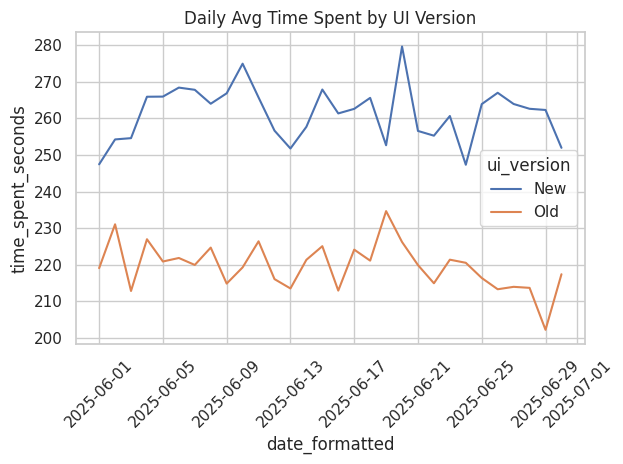

In [36]:
# Check how time spent varies over time with each UI version.

df['date_formatted'] = pd.to_datetime(df['date_formatted'], format='%d-%m-%Y')

daily_avg = df.groupby(['date_formatted', 'ui_version'])['time_spent_seconds'].mean().reset_index()

sns.lineplot(x='date_formatted', y='time_spent_seconds', hue='ui_version', data=daily_avg)
plt.title("Daily Avg Time Spent by UI Version")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Optional Modeling**

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Encode ui_version
df['ui_version_encoded'] = df['ui_version'].map({'Old': 0, 'New': 1})

X = df[['ui_version_encoded', 'page_clicks', 'scroll_depth']]
y = df['time_spent_seconds']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 53.068618472866376
